# UCL BIOC0016 - Bioinformatics
Alan R. Lowe (a.lowe@ucl.ac.uk)

---


### Bioimage informatics / Machine learning

The aim of this notebook is to provide an example of using a convolutional neural network (CNN) to classify different cell states using simple image data. 

**This is based on a real research project** - To read more about the project, read the link here. [Research](https://lowe.cs.ucl.ac.uk/cellx.html)

We will be using Python, Jupyter Notebooks and Tensorflow to do this.

The images that you are provided with are called a 'hold out' set, since they have come from the original data set, but have not been used to train the neural network.

There are the following sections:
1. Data annotation
2. Make predictions with a convolutional neural network
3. Compare these with the data that you have annotated
4. Determine the accuracy of the model


### Instructions

Code sections are coloured according to the following scheme:

* <font color='red'>RED</font> - Code that needs to be written by you. These are often very simple.
* <font color='blue'>BLUE</font> - Code that needs to be edited by you, perhaps changing some parameters.
* <font color='green'>GREEN</font> - A task that needs to be completed by you. This may be recording the results.


### Recording your results

As you complete different sections of the practical, we ask you to complete different sections of this google from.

[Google form](https://docs.google.com/forms/d/e/1FAIpQLSdhPIHCMvtHVUCe-7_XYHujWIW2mq7SzcA2mfYh6LHiZ2LUPQ/viewform)

### Further reading
* https://lowe.cs.ucl.ac.uk/cellx.html
* https://en.wikipedia.org/wiki/Bioimage_informatics
* https://teachablemachine.withgoogle.com/train/image

# PRACTICAL
---

## PART 1 - Data Annotation


To test how well the neural network is able to perform on unseen images, we need to manually annotate the images with a label. We can then count how many labels the neural network correctly predicts. In this section, you will be provided with a random sample of (n=25) unlabeled images. Using the guide below, please annotate each image with one of the six labels provided. If you are unsure, use the 'Unknown' label.

You will store these annotations using two Python data structures, a `list` and a `dictionary`.

A `list` is just what it sounds like, a sequence of items in order. A list can have multiple entries (separated by commas), or be empty:
```python
list_of_numbers = [0, 1, 2, 3, 4]
empty_list = []
```

A `dictionary` stores key-value pairs.

The final data structure may look something like this:

```python 
annotation = {'interphase': [0,5,3,20], 
              'prometaphase': [7,2], 
              'metaphase': [14,33,6], 
              'anaphase': [508,1], 
              'apoptosis': [8], 
              'unknown': []}```

### Set up plotting and import some useful libraries

In [1]:
%matplotlib inline

import helpers

### Get a sample of images from the test dataset

In [2]:
images, image_idx = helpers.get_example_images(num_images=25)

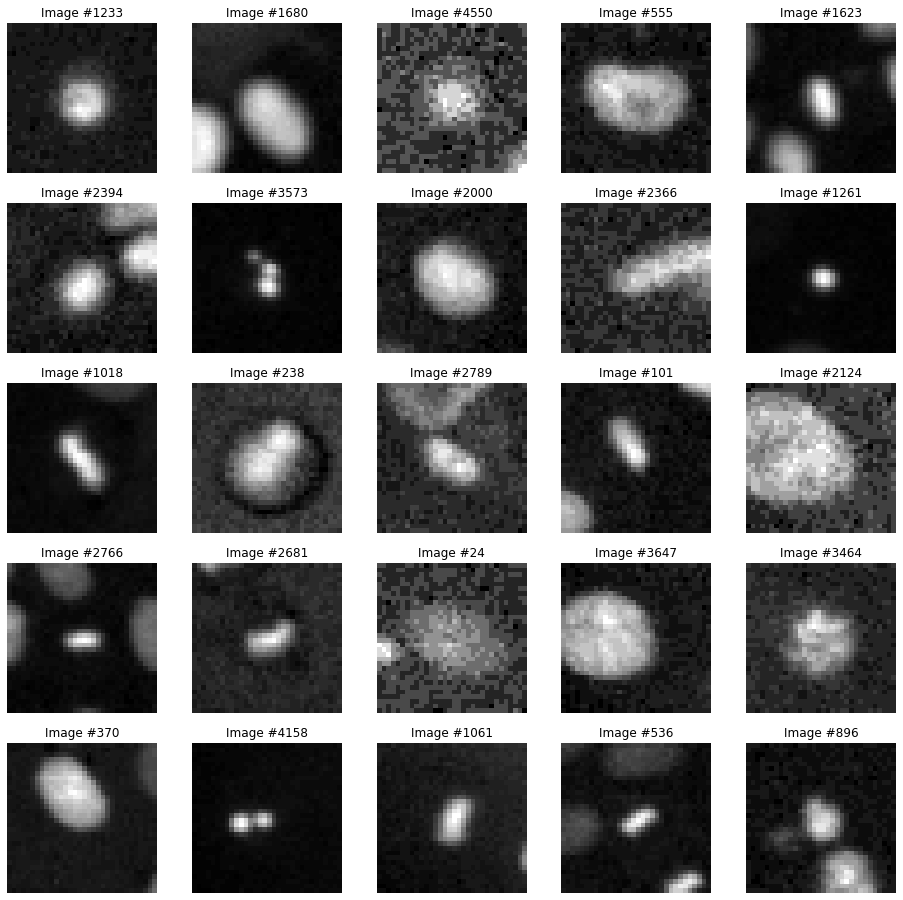

In [3]:
helpers.plot_images(images, image_idx)

* <font color='red'>**Complete the annotation `dictionary`**</font>

In [8]:
annotation = {}

In [10]:
# validate the annotation
helpers.validate_annotation(annotation)

* <font color='green'>**Complete the [Google form](https://docs.google.com/forms/d/e/1FAIpQLSdhPIHCMvtHVUCe-7_XYHujWIW2mq7SzcA2mfYh6LHiZ2LUPQ/viewform)**, to record the annotations you have made</font>


## PART 2 - Using the CNN to make predictions
---

In [ ]:
model = helpers.load_CNN_model()

In [5]:
import numpy as np
predictions = model.predict(np.stack([im[...,np.newaxis] for im in images], axis=0))

In [6]:
y_pred = np.argmax(predictions, axis=1)
print(y_pred, predictions.shape)

[4 3 4 0 3 3 4 0 3 4 2 2 3 3 1 3 3 0 2 4 2 4 3 3 3] (25, 5)


In [7]:
for i, y in enumerate(y_pred):
    print(f'Image #{image_idx[i]:<5} --> {helpers.STATES[y]:>12} ({predictions[i,y]:.5f})')

Image #1233  -->    apoptosis (0.98750)
Image #1680  -->     anaphase (0.49664)
Image #4550  -->    apoptosis (0.81326)
Image #555   -->   interphase (0.78323)
Image #1623  -->     anaphase (0.98366)
Image #2394  -->     anaphase (0.66171)
Image #3573  -->    apoptosis (0.96445)
Image #2000  -->   interphase (0.83392)
Image #2366  -->     anaphase (0.68757)
Image #1261  -->    apoptosis (0.99996)
Image #1018  -->    metaphase (0.99308)
Image #238   -->    metaphase (0.49996)
Image #2789  -->     anaphase (0.52937)
Image #101   -->     anaphase (0.98064)
Image #2124  --> prometaphase (0.40423)
Image #2766  -->     anaphase (0.98010)
Image #2681  -->     anaphase (0.99576)
Image #24    -->   interphase (0.70449)
Image #3647  -->    metaphase (0.78551)
Image #3464  -->    apoptosis (0.57789)
Image #370   -->    metaphase (0.75996)
Image #4158  -->    apoptosis (1.00000)
Image #1061  -->     anaphase (0.93392)
Image #536   -->     anaphase (0.98899)
Image #896   -->     anaphase (0.50642)
